[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


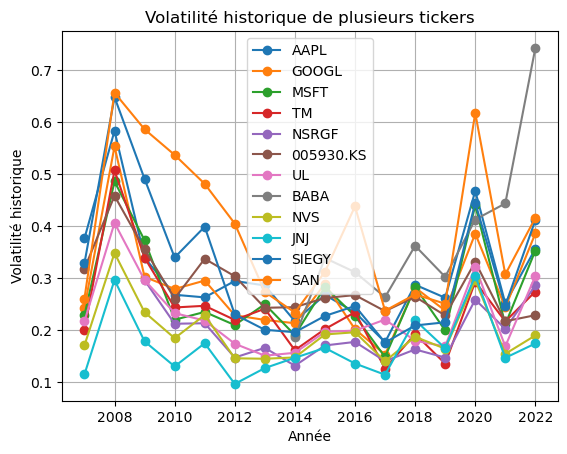

In [34]:
#on va ici créer une fonction qui permet de rentrer une liste de ticker d'indice boursier et d'obtenir à la fin un graphe des différentes courbes de vol associéés aux tickers
!pip install matplotlib 
!pip install yfinance
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#fonction permettant de calculer la volatilité historique depuis yfinance 
def calcul_vol(ticker, debut, fin): 
    try:
        data = yf.download(ticker, start=debut, end=fin, interval="1d")

        if data.empty or 'Close' not in data.columns:
            print(f"Aucune donnée disponible pour le ticker {ticker} entre {debut} et {fin}")
            return []

        returns = data['Close'].pct_change().dropna()
    
        # Liste pour stocker la volatilité pour chaque année
        vol_annuelle = []
    
        # Calculer la volatilité pour chaque année
        for annee in range(int(debut[:4]), int(fin[:4])):
            returns_annee = returns[returns.index.year == annee]
            volatilite = np.sqrt(len(returns_annee)) * returns_annee.std()
            vol_annuelle.append(volatilite)
        
        return vol_annuelle
    except Exception as e:
        print(f"Erreur lors du téléchargement des données pour le ticker {ticker}: {e}")
        return []

#les bornes chronologiques et les tickers utilités
debut = "2007-01-01"
fin = "2023-01-01"
tickers = ["AAPL", "GOOGL", "MSFT", "TM", "NSRGF", "005930.KS", "UL", "BABA", "NVS", "JNJ", "SIEGY", "SAN"]

#liste pour stoker les années et liste pour les volatilité 
A = np.array(list(range(int(debut[:4]), int(fin[:4]))))
V=[]

#calcul volatilité pour chaque ticker 
for ticker in tickers:
    volatilite = np.array(calcul_vol(ticker, debut, fin))
    if len(volatilite) == len(A):
        V.append(volatilite)

#tracé des données
for i, ticker in enumerate(tickers):
    if i < len(V):
            plt.plot(A, V[i], marker='o', linestyle='-', label=ticker)
plt.title('Volatilité historique de plusieurs tickers')
plt.xlabel('Année')
plt.ylabel('Volatilité historique')
plt.legend()
plt.grid(True)
plt.show()
